In [21]:
from datasets import load_dataset


minds = load_dataset('PolyAI/minds14', name='en-US', split='train')
minds

Generating train split: 563 examples [00:00, 19688.12 examples/s]


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

In [22]:
example = minds[0]
example

{'path': '/Users/jamisonproctor/.cache/huggingface/datasets/downloads/extracted/e56200271c49d417aff97264fd7f5f6aec50e597940be4ee13a29831190681b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '/Users/jamisonproctor/.cache/huggingface/datasets/downloads/extracted/e56200271c49d417aff97264fd7f5f6aec50e597940be4ee13a29831190681b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.        ,  0.        ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

In [23]:
id2lable = minds.features['intent_class'].int2str
id2lable(example['intent_class'])

'joint_account'

In [24]:
columns_to_remove = ['lang_id', 'english_transcription']
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 563
})

In [25]:
import gradio as gr

def generate_audio():
    example = minds.shuffle()[0]
    audio = example['audio']
    return (
        audio['sampling_rate'],
        audio['array'],
    ), id2lable(example['intent_class'])

with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/Users/jamisonproctor/Dev/Hugging_Face_Audio/venv/lib/python3.11/site-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


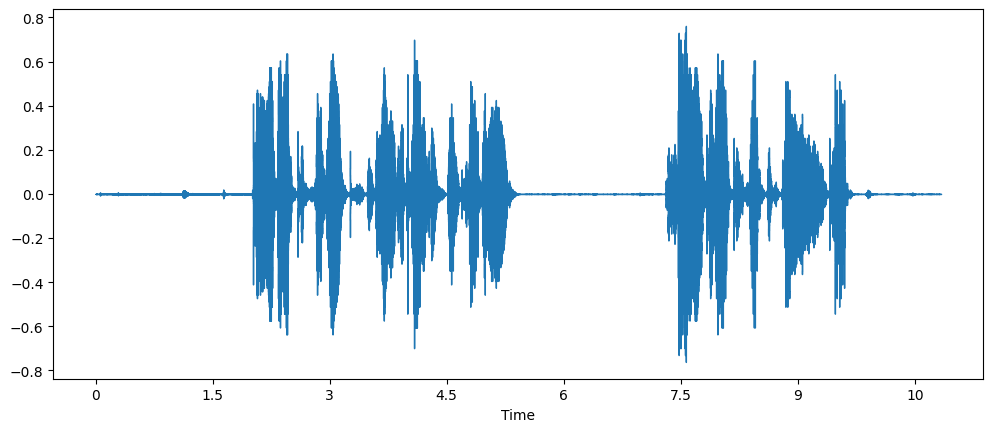

In [26]:
import librosa
import matplotlib.pyplot as plt
import librosa.display


array = example['audio']['array']
sampling_rate = example['audio']['sampling_rate']

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)